## Guess the Coin

In [1]:
# Week 2 — From Discrete to Continuous Bayes

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from ipywidgets import interact, IntSlider
%matplotlib inline


plt.style.use("seaborn-v0_8")

# --- Parameters ---
# prior parameters (Beta distribution)
a_prior, b_prior = 2, 2   # "probably fair" — centered around 0.5

# --- Helper function ---
def plot_posterior(heads=0, tosses=0):
    """
    Plot prior, likelihood (up to scale), and posterior for given data.
    heads: number of observed heads
    tosses: total number of coin tosses
    """
    x = np.linspace(0, 1, 400)
    
    # prior Beta(a,b)
    prior = beta.pdf(x, a_prior, b_prior)
    
    # posterior Beta(a+a_prior, b+b_prior)
    a_post = a_prior + heads
    b_post = b_prior + tosses - heads
    posterior = beta.pdf(x, a_post, b_post)
    
    plt.figure(figsize=(7,4))
    plt.plot(x, prior, "--", label=f"Prior Beta({a_prior},{b_prior})")
    plt.plot(x, posterior, label=f"Posterior Beta({a_post},{b_post})")
    plt.fill_between(x, posterior, alpha=0.2)
    plt.xlabel("Coin bias θ (probability of heads)")
    plt.ylabel("Density")
    plt.title(f"{heads} heads out of {tosses} tosses")
    plt.legend()
    plt.show()

# --- Interactive widget ---
interact(plot_posterior,
         heads=IntSlider(min=0, max=10, step=1, value=4, description="Heads"),
         tosses=IntSlider(min=1, max=10, step=1, value=5, description="Tosses"));



interactive(children=(IntSlider(value=4, description='Heads', max=10), IntSlider(value=5, description='Tosses'…

### Mini Exercise
Play with the sliders until you find a situation where your prior and data disagree.
- Describe what happens to the posterior.
- Why doesn’t it completely ignore your prior after only a few tosses?


In [2]:
# Enter your answers here. (you can use a markedown cell if you prefer)

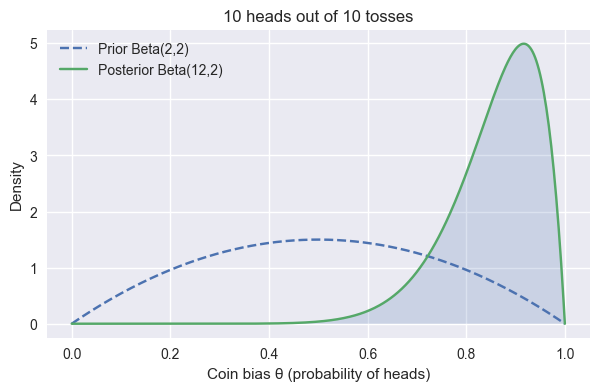

In [3]:
# Run this cell to see the disagreement
plot_posterior(heads=10, tosses=10)

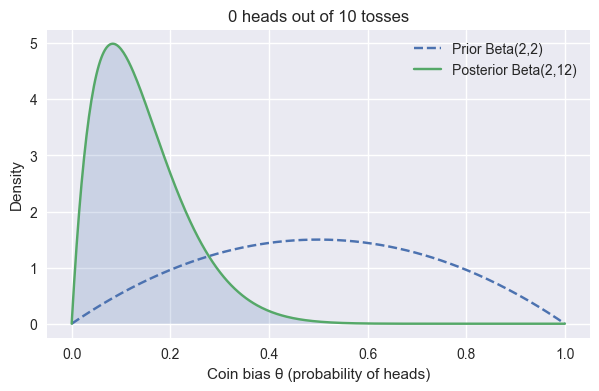

In [4]:
# Run this cell to see the posterior as a compromise
plot_posterior(heads=0, tosses=10)

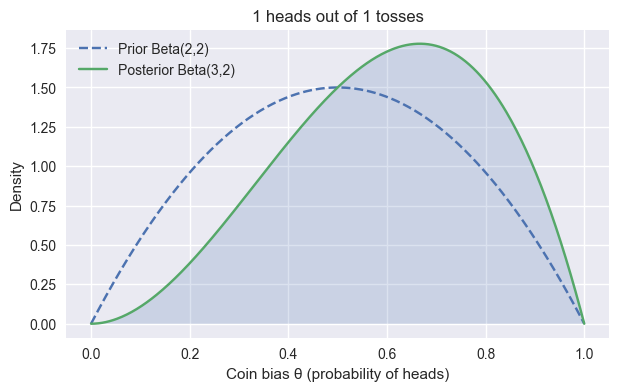

In [5]:
# 1 head in 1 toss. Posterior is Beta(2+1, 2+0) = Beta(3, 2)
# The peak is (3-1)/(3+2-2) = 2/3 = 0.66
plot_posterior(heads=1, tosses=1)

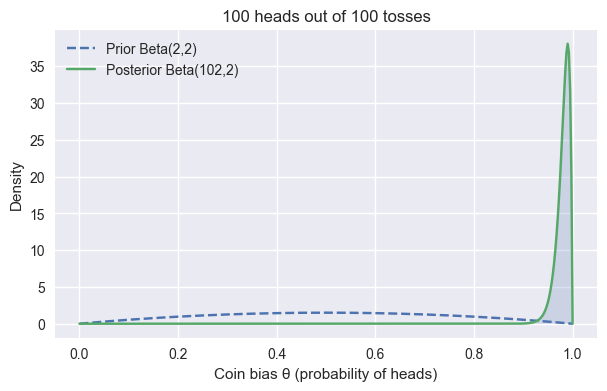

In [6]:
# 100 heads in 100 tosses. Posterior is Beta(2+100, 2+0) = Beta(102, 2)
# The peak is (102-1)/(102+2-2) = 101/102 = 0.99
plot_posterior(heads=100, tosses=100)